<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [7]:
boston_df.shape

(506, 14)

In [9]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

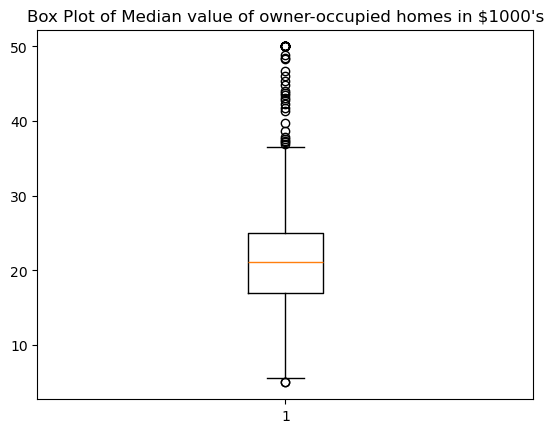

In [15]:
# For the "Median value of owner-occupied homes" provide a boxplot
# MEDV - Median value of owner-occupied homes in $1000's
pyplot.boxplot(boston_df['MEDV'])
pyplot.title("Box Plot of Median value of owner-occupied homes in $1000's")
pyplot.show()

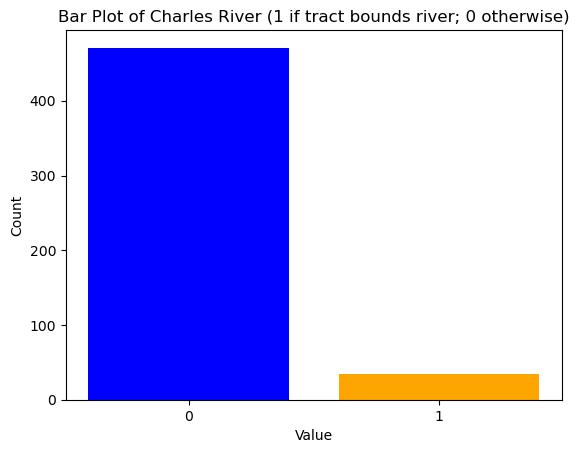

In [17]:
# Provide a bar plot for the Charles river variable
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
charles_river_data = boston_df['CHAS']
charles_river_data_counts = boston_df['CHAS'].value_counts()

pyplot.bar(charles_river_data_counts.index, charles_river_data_counts.values, color=['blue', 'orange'])
pyplot.xticks([0, 1], labels=['0', '1'])  # Label the x-axis
pyplot.xlabel('Value')
pyplot.ylabel('Count')
pyplot.title('Bar Plot of Charles River (1 if tract bounds river; 0 otherwise)')
pyplot.show()

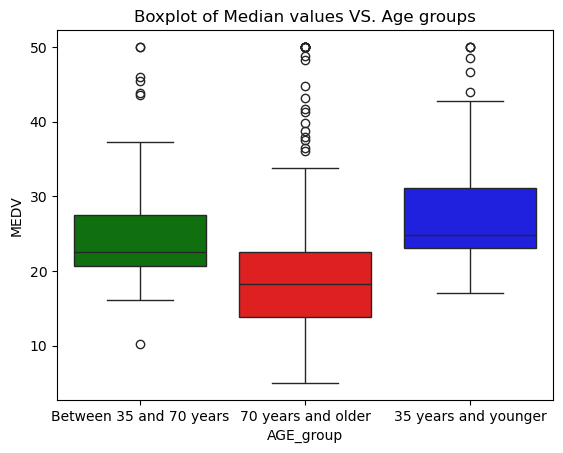

In [19]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[boston_df['AGE'] <= 35, 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'AGE_group'] = 'Between 35 and 70 years'
boston_df.loc[boston_df['AGE'] > 70, 'AGE_group'] = '70 years and older'

# Assign colors to each age group
custom_palette = {
    '35 years and younger': 'blue',
    'Between 35 and 70 years': 'green',
    '70 years and older': 'red'
}

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, hue='AGE_group', palette=custom_palette, dodge=False, legend=False)
pyplot.title('Boxplot of Median values VS. Age groups')  
pyplot.show()

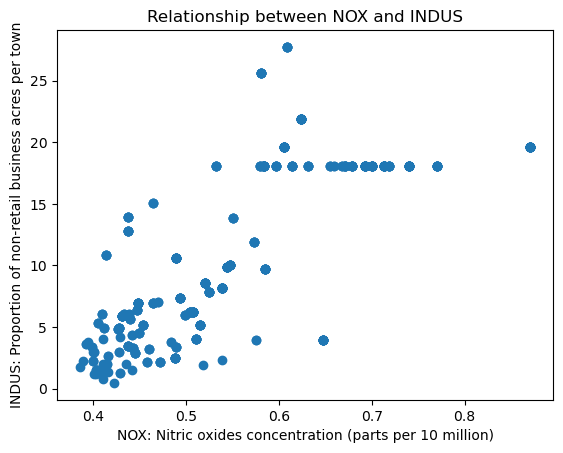

In [21]:
# Provide a scatter plot to show the relationship between 
# Nitric oxide concentrations and the proportion of non-retail business acres per town.
# What can you say about the relationship?
# NOX - nitric oxides concentration (parts per 10 million)
# INDUS - proportion of non-retail business acres per town

pyplot.scatter(boston_df['NOX'], boston_df['INDUS'])
pyplot.xlabel('NOX: Nitric oxides concentration (parts per 10 million)')
pyplot.ylabel('INDUS: Proportion of non-retail business acres per town')
pyplot.title('Relationship between NOX and INDUS')
pyplot.show()

From the plot above, we see that:
- There appears to be a positive relationship between NOX and INDUS, as the points generally trend upward.
- As the NOX concentration increases, the INDUS values also tend to increase.
- The relationship does not appear to be perfectly linear; the points seem clustered at certain INDUS values and show some spread.
- There are clusters of data points, particularly at lower NOX concentrations (e.g., around 0.4 to 0.6) and a few distinct points at higher NOX concentrations.

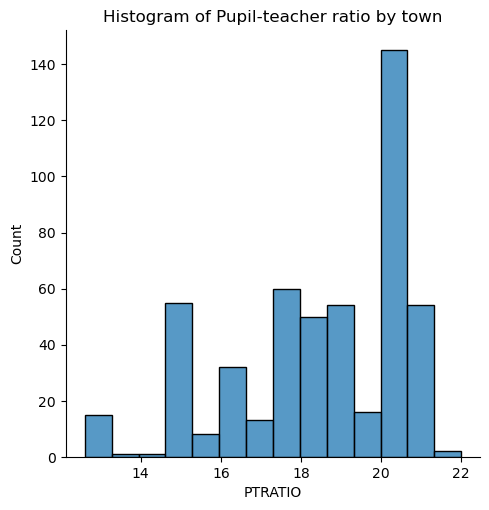

In [23]:
# Create a histogram for the pupil to teacher ratio variable
# PTRATIO - pupil-teacher ratio by town

ax = sns.displot(boston_df['PTRATIO'], kde = False).set(title = 'Histogram of Pupil-teacher ratio by town')

# Task 3: Use the appropriate tests to answer the questions provided

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- variable: CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- variable: MEDV - Median value of owner-occupied homes in $1000's

Hypothesis:
- Null hypothesis: There's no significant difference in median value beween CHAS and MEDV
- Alternative hypothesis: There's a significant difference in median value of CHAS and MEDV

In [81]:
# perform the test statistics
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519902e-05, df=504.0)

#### Conclusion:
#### Given the p-value is less than 0.05, we reject the null Hypothesis.
#### There is a significant difference in median value of houses bounded by the Charles river or not.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- variable: NOX - nitric oxides concentration (parts per 10 million)
- variable: INDUS - proportion of non-retail business acres per town

Hypothesis:
* Null hypothesis: There is no significant difference in median values of NOX and INDUS
* Alternative hypotheis: There is a statistical difference in median values of NOX and INDUS

In [83]:
# Test for equality of median
medv_group1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'] 
medv_group2 = boston_df[boston_df['AGE_group'] == 'Between 35 and 70 years']['MEDV']
medv_group3 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

scipy.stats.levene(medv_group1, medv_group2, medv_group3, center='median')

LeveneResult(statistic=3.471820890881101, pvalue=0.0318067780613382)

#### since the p-value is less than 0.05, the median are not equal, for the purposes of this question, we will move along to use ANOVA test

In [85]:
f_statistic, p_value = scipy.stats.f_oneway(medv_group1, medv_group2, medv_group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion:
#### Given p-value is less than 0.05, we reject the null hypothesis.
#### There is statistical difference in median values of houses for each proportion of owner occpied units built prior to 1940.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- variable: NOX - nitric oxides concentration (parts per 10 million)
- variable: INDUS - proportion of non-retail business acres per town

Hypothesis:
* Hull hypotheis: There is no correlation between NOX and INDUS
* Alternative hypothesis: There is a correlation between NOX and INDUS

In [66]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

#### Given the Pearson Coefficient is 0.76 and p-value less than 0.05, we reject the null hypothesis.
#### There is a positive correlation between Nitric oxide concentration and the proportion of non-retail business acres per town

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- variable: DIS - weighted distances to five Boston employment centres
- variable: MEDV - Median value of owner-occupied homes in $1000's

Hypothesis:
* $H_0: β1$ = 0 (DIS has no effect on MEDV)
* $H_1: β1$ is not equal to 0 (DIS has an effect on MEDV)

In [61]:
x = boston_df['DIS']
y = boston_df['MEDV']

# add an intercept (beta_0) to our model
x = sm.add_constant(x) 

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        16:00:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis, meaning DIS has an effect on MEDV. There is a significant positive impact of an additional weighted distance (1.0916 for each unit of distance) to the five Boston employment centers on the median value of owner-occupied homes.